# CHICKEN PRICES IN INDIA

Epp Haavasalu, Grete Hollo

The prices dataset used in this project was taken from https://www.kaggle.com/syedjaferk/chicken-prices-india

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split

prices_df = pd.read_csv('chicken_prices_india.csv', sep=',')
prices = prices_df.values
df = pd.DataFrame(prices_df)
df["District"] = df["District"].str.split("(", expand=True )

## Cleaning the data.
We replace faulty prices with the mean of the month in the given districts and Nan values the same way, or, if there are too many values missing in the row, we simply remove it.

In [2]:
original_data_nans = df.copy(deep=True) # Make a deep copy, including a copy of the data and the indices

only_prices = df.drop(columns = ['Year', 'Month', 'District'])

x = 0
y = 0
changes = {}
nones = []
means = []


# iterate over rows in the prices table
for Index, row in only_prices.iterrows():
    row_changed = False
    median = row.median()
    mean_row = []
    for k in range(len(row)):
        mean_row.append(row[k])
        
    changed_values = []
    none_values = []

    # iterate over every value in the given row
    for i in range(31):
        try:
            
            if math.isnan(row[i]):
                none_values.append(i)
                row_changed = True
                
            # see if the values differ too much from the median
            elif (row[i] < median - 60) or (row[i] > median + 60): 
                
                #save the location of the value that needs changing
                changed_values.append(i)
                
                #create new row to calculate an accurate mean
                mean_row.remove(row[i])
                                
                row_changed = True
        except:
            print("error     error     error     error     error     error     error     error")
            continue
    
    if (row_changed):
        
        # if more than 5 values are missing from a row, then delete the whole row
        if len(none_values) > 5:
            nones.append(y)
        
        else: 
            mean_row  =[x for x in mean_row if math.isnan(x) == False]
            new_mean = round(sum(mean_row) / len(mean_row), 2)
            
            means.append(new_mean)
            
            for j in changed_values:
                df.iloc[y, j+3] = round(new_mean,2)

            for jj in none_values:
                df.iloc[y, jj+3] = round(new_mean,2)

            changes[y] = changed_values

            for ii in none_values:
                changes[y].append(ii)
    else:
        means.append(round(sum(mean_row) / len(mean_row), 2))
    
    y += 1


for kk in nones:
    df.drop(df.loc[df.index==kk].index, inplace=True)

df["Mean"] = means

print("Changes made: " + str(len(changes)))

Changes made: 1702


## Separating districts into states
Separating districts into states makes comprehending the data easier and gives us a better overview of the price trends.
We decided to just manually insert the states for districts that we couldn't automatically categorize.


The data for Indian states is from https://github.com/thatisuday/indian-cities-database/blob/master/cities.json.


For the few districts that had confusing info as to which state it belonged to, we simply googled it and added it manually.

In [3]:
with open("cities_states.txt", 'r') as text:
    tekst = text.read()

tekst2 = tekst.split('"')
l = len(tekst2)
StatesDictionary = {}

for i in range(3, l, 8):
    linn = tekst2[i]
    state = tekst2[i+4].strip()
    state.capitalize()

    if state in StatesDictionary.keys():
        StatesDictionary[state].append(linn)
    else:
        StatesDictionary[state] = [linn]

p = 0
for e in StatesDictionary.keys():
    m = StatesDictionary[e]
    if len(m) < 5:
        p += 1
        

In [4]:
if "West Bengal" in StatesDictionary.keys():
    for x in ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]:
            StatesDictionary["West Bengal"].append(x)
else:  
    StatesDictionary["West Bengal"] = ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]
    

for x in ["Bokaro", "Barhi", "Hazaribagh"]:
    StatesDictionary["Jharkhand"].append(x)

for x in ["Jagdishpur"]:
    StatesDictionary["Bihar"].append(x)

for x in ["Jhunjhunu", "Singhana", "Kotputli", "Chirawa"]:
    StatesDictionary["Rajasthan"].append(x)
    
for x in ["Mirza", "Biswantahchariali", "Kaliabor", "Raha", "Sarthebari", "Pathsala", "Mangaldai", "Jagiroad", "Bokajan"]:
        StatesDictionary["Assam"].append(x)

for x in ["Trichy", "Krishnagiri", "Kovai", "Negercoil", "Nilgiris"]:
        StatesDictionary["Tamil Nadu"].append(x)

for x in ["Trivandrum", "Cochin", "Chittur", "Calicut"]:
    StatesDictionary["Kerala"].append(x)

for j in ["Dasuya", "Samrala", "Mahilpur", "Garhshankar"]:
    StatesDictionary["Punjab"].append(j)

for t in ["Hosadurga"]:
    StatesDictionary["Karnataka"].append(t)

for t in ["Gorakhpur", "Akbarpur", "Basti", "Amethi", "Faizabad"]:
    StatesDictionary["Uttar Pradesh"].append(t)

StatesDictionary["Odisha"] = ["Brahampur", "Angul", "Keonjhar", "Jagatsinghpur"]
    
StatesDictionary["Haryana"].append("Shahabad")
StatesDictionary.pop("Hardoi")
StatesDictionary.pop("Rampur")

StatesDictionary["Uttar Pradesh"].append("Shamsabad")
StatesDictionary.pop("Farrukhabad")
StatesDictionary.pop("Agra")


['Shamsabad']

In [5]:
hehStates = []

for i in range(len(df)): # iterate over every row
    district = df.iloc[i]["District"] # district of said row
    sai = False
    for state in StatesDictionary.keys(): # check for the state
        if district in StatesDictionary[state]:
            hehStates.append(state)
            sai = True
            break
    if not sai:
        hehStates.append(np.NaN)
    

In [6]:
df["State"] = hehStates

dfNaN = df[df["State"].isna() == True]

Finding the monthly mean for every state.

In [7]:
df_2 = df.drop(labels=["District", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis = 1)
aggregation_functions = {'Mean': 'mean'}
df_state_mean = df_2.groupby(["State", "Year", "Month"]).aggregate(aggregation_functions)
df_state_mean

Mean
State       Year Month                
Assam       2019 April      101.839091
                 December    78.596364
                 February    93.653636
                 January     95.971818
                 July        96.211818
...                                ...
West Bengal 2021 July       121.187692
                 June       113.487692
                 March      115.731538
                 May         97.070000
                 September   98.478462

[458 rows x 1 columns]

Then we separate the dataset into different years to make the graphs better to look at.

In [8]:
df_state_mean_2 = df_state_mean.reset_index()

df_state_mean_2019 = df_state_mean_2.loc[df_state_mean_2['Year']==2019]
df_state_mean_2020 = df_state_mean_2.loc[df_state_mean_2['Year']==2020]
df_state_mean_2021 = df_state_mean_2.loc[df_state_mean_2['Year']==2021]

## Visualizing changes

First, graphs showing changes in chicken price monthly means in different states, year by year.

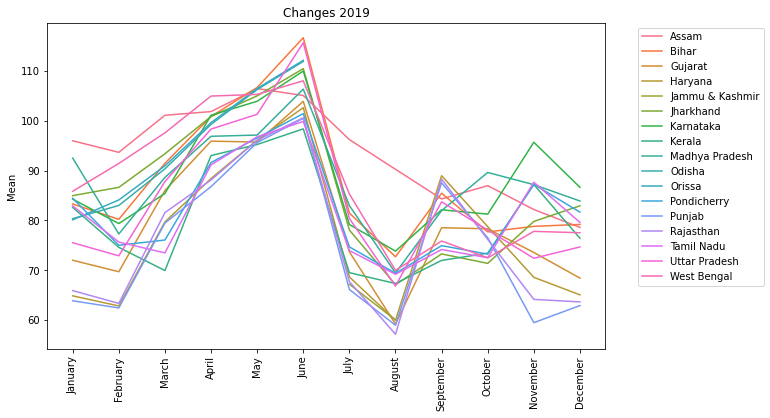

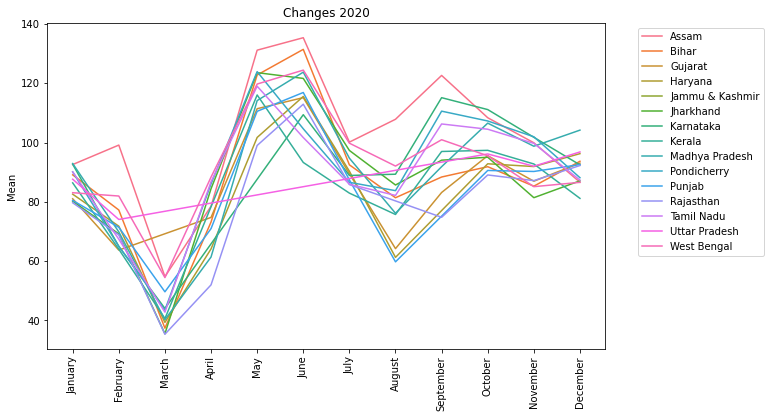

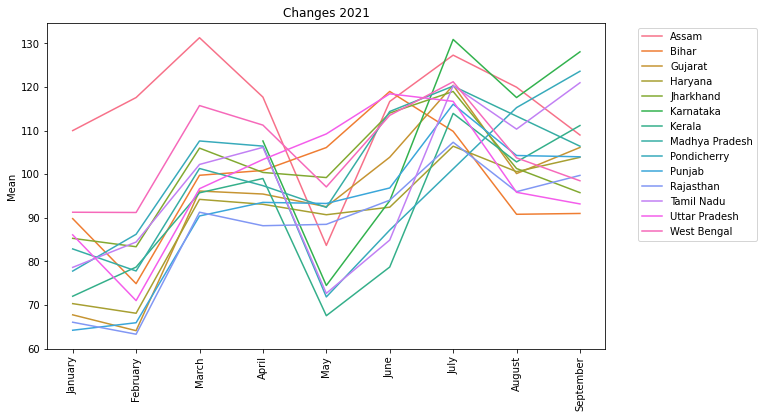

In [9]:
# set the month column as categorical and set the order for calendar months
month_2019 = pd.Categorical(df_state_mean_2019['Month'], categories=list(calendar.month_name)[1:], ordered=True)
# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_2019, y=df_state_mean_2019['Mean'], data=df_state_mean_2019, hue=df_state_mean_2019['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Changes 2019")
plt.show()

month_2020 = pd.Categorical(df_state_mean_2020['Month'], categories=list(calendar.month_name)[1:], ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_2020, y=df_state_mean_2020['Mean'], data=df_state_mean_2020, hue=df_state_mean_2020['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Changes 2020")
plt.show()

month_2021 = pd.Categorical(df_state_mean_2021['Month'], categories=list(calendar.month_name)[1:], ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_2021, y=df_state_mean_2021['Mean'], data=df_state_mean_2021, hue=df_state_mean_2021['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Changes 2021")
plt.show()

Secondly, yearly changes in prices in different states.

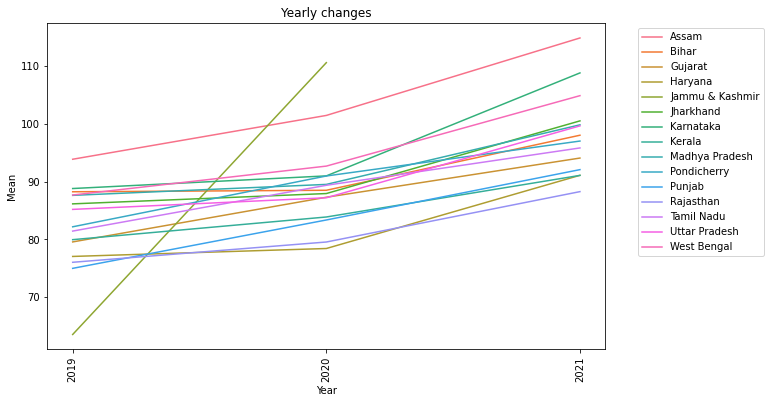

In [10]:
df_year_mean = df_2.drop(labels="Month", axis = 1).groupby(["State", "Year"]).aggregate({'Mean': 'mean'}).reset_index()
# siit jätab välja Odisha (index=26) ja Orissa (index=27), sest mõlemal ainult 2019 andmed

df_year_mean.drop([26, 27], inplace=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_year_mean['Year'], y=df_year_mean['Mean'], data=df_year_mean, hue=df_year_mean['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ticks_data = [2019,2020,2021]
plt.xticks(ticks_data)
plt.xticks(rotation=90)
plt.title("Yearly changes")
plt.show()

Third, changes according to the season in different states.

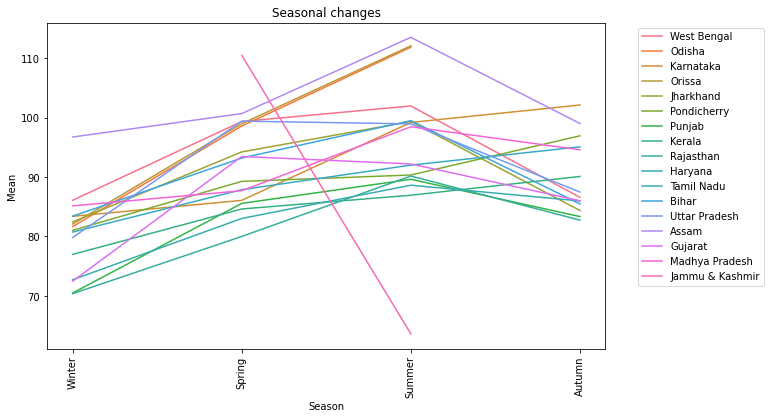

In [11]:
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']

seasons = []
for i in range(len(df_state_mean_2["Month"])):
    month = df_state_mean_2.iloc[i]["Month"]
    if month in winter:
        seasons.append("Winter")
    elif month in spring:
        seasons.append("Spring")
    elif month in summer:
        seasons.append("Summer")
    else: # month in autumn
        seasons.append("Autumn")
        
df_state_season_mean = df_state_mean_2.copy().drop(labels=["Month", "Year"], axis = 1)
df_state_season_mean["Season"] = seasons
df_state_season_mean = df_state_season_mean.groupby(["State", "Season"]).aggregate({'Mean': 'mean'})

df_state_season_mean_2 = df_state_season_mean.reset_index()

sort_order = ["Winter", "Spring", "Summer", "Autnum"]
df_state_season_mean_2.index = pd.CategoricalIndex(df_state_season_mean_2["Season"], categories=sort_order, ordered=True)
df_state_season_mean_2 = df_state_season_mean_2.sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_state_season_mean_2['Season'], y=df_state_season_mean_2['Mean'], data=df_state_season_mean_2, hue=df_state_season_mean_2['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Seasonal changes")
plt.show()

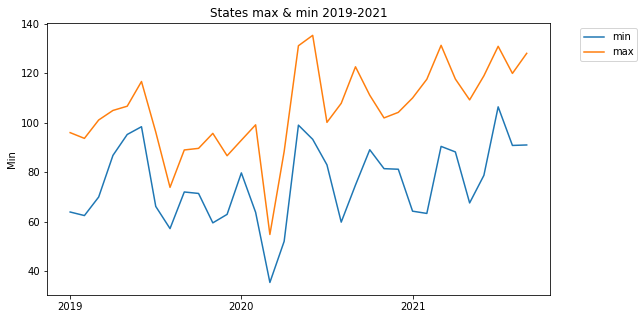

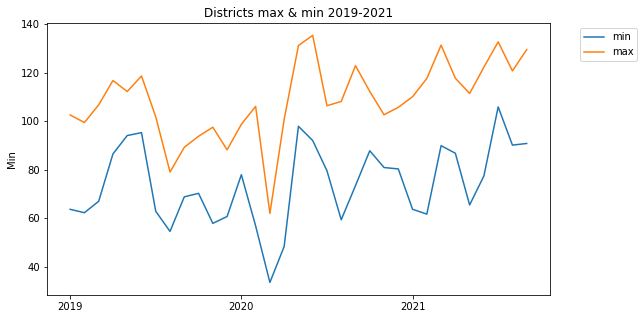

In [21]:
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]

month_2019 = pd.Categorical(df_state_mean_2019['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2019 = {}
for i in sort_order:
    months_2019[i] = df_state_mean_2019.loc[df_state_mean_2019['Month'] == i]

min = []
max = []
months = []
for key in months_2019:
    min.append(months_2019[key]['Mean'].min())
    max.append(months_2019[key]['Mean'].max())
    months.append(key)


df_minmax_2019 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})

month_2020 = pd.Categorical(df_state_mean_2020['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2020 = {}
for i in sort_order:
    months_2020[i] = df_state_mean_2020.loc[df_state_mean_2020['Month'] == i]

min = []
max = []
months = []

for key in months_2020:
    min.append(months_2020[key]['Mean'].min())
    max.append(months_2020[key]['Mean'].max())
    months.append(key)


df_minmax_2020 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})
df_minmax_2020.index += 12
month_2021 = pd.Categorical(df_state_mean_2021['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2021 = {}
for i in sort_order:
    months_2021[i] = df_state_mean_2021.loc[df_state_mean_2021['Month'] == i]

min = []
max = []
months = []
for key in months_2021:
    min.append(months_2021[key]['Mean'].min())
    max.append(months_2021[key]['Mean'].max())
    months.append(key)

df_minmax_2021 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})
df_minmax_2021.index += 24

df_minmax1 = df_minmax_2019.append(df_minmax_2020)

df_minmax2 = df_minmax1.append(df_minmax_2021)

plt.figure(figsize=(9, 5))
sns.lineplot(x=df_minmax2.index, y=df_minmax2['Min'], label='min')
sns.lineplot(x=df_minmax2.index, y=df_minmax2['Max'], label='max')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("States max & min 2019-2021")
plt.xticks(labels=['2019','2020','2021'], ticks=[0,12,24])

plt.show()

df_district_mean = df.copy().drop(labels=["State", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis = 1)
df_district_mean = df_district_mean.groupby(["District", "Year", "Month"]).aggregate({'Mean': 'mean'})
df_district_mean
df_district_mean_2 = df_district_mean.reset_index()

df_district_mean_2019 = df_district_mean_2.loc[df_district_mean_2['Year']==2019]
df_district_mean_2020 = df_district_mean_2.loc[df_district_mean_2['Year']==2020]
df_district_mean_2021 = df_district_mean_2.loc[df_district_mean_2['Year']==2021]

sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]

month_2019 = pd.Categorical(df_district_mean_2019['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2019 = {}
for i in sort_order:
    months_2019[i] = df_district_mean_2019.loc[df_district_mean_2019['Month'] == i]

min = []
max = []
months = []
for key in months_2019:
    min.append(months_2019[key]['Mean'].min())
    max.append(months_2019[key]['Mean'].max())
    months.append(key)


df_minmax_2019 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})

month_2020 = pd.Categorical(df_district_mean_2020['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2020 = {}
for i in sort_order:
    months_2020[i] = df_district_mean_2020.loc[df_district_mean_2020['Month'] == i]

min = []
max = []
months = []

for key in months_2020:
    min.append(months_2020[key]['Mean'].min())
    max.append(months_2020[key]['Mean'].max())
    months.append(key)


df_minmax_2020 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})
df_minmax_2020.index += 12
month_2021 = pd.Categorical(df_district_mean_2021['Month'], categories=list(calendar.month_name)[1:], ordered=True)

months_2021 = {}
for i in sort_order:
    months_2021[i] = df_district_mean_2021.loc[df_district_mean_2021['Month'] == i]

min = []
max = []
months = []
for key in months_2021:
    min.append(months_2021[key]['Mean'].min())
    max.append(months_2021[key]['Mean'].max())
    months.append(key)

df_minmax_2021 = pd.DataFrame({'Month': months,'Min': min, 'Max': max})
df_minmax_2021.index += 24

df_minmax1 = df_minmax_2019.append(df_minmax_2020)

df_minmax2 = df_minmax1.append(df_minmax_2021)

plt.figure(figsize=(9, 5))
sns.lineplot(x=df_minmax2.index, y=df_minmax2['Min'], label='min')
sns.lineplot(x=df_minmax2.index, y=df_minmax2['Max'], label='max')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Districts max & min 2019-2021")
plt.xticks(labels=['2019','2020','2021'], ticks=[0,12,24])

plt.show()



In [13]:
# changes = dict: key=row, values=changed_value_index

df_3 = df.drop(labels=["Month", "District"], axis=1)
#df_3 = df_3.groupby("State").apply(print)

l = len(df_3)
state_year_day_mean = {} # (state : (year : (day : means))

for day in range(1,32): # päevad: 1-31
    
    for row in range(l): # read otsast lõpuni
        value = df_3[str(day)].iloc[row] # selle päeva üks väärtustest
        year = df_3["Year"].iloc[row]
        state = df_3["State"].iloc[row]
        add = True
        if row in changes.keys(): # changes = {18:[3,5]}
            if day in changes[row]: # 3 in [3,5]
                for i in changes[row]: 
                    if day == i: # 3 == 3
                        #don't add, because it is a changed value
                        add = False
                        break
        if add:
            if state in state_year_day_mean.keys():
                year_day_mean = state_year_day_mean[state].keys()
                if year in year_day_mean:
                    day_mean = state_year_day_mean[state][year].keys()
                    if str(day) in day_mean:
                        state_year_day_mean[state][year][str(day)].append(value)
                    else: 
                        state_year_day_mean[state][year][str(day)] = [value]
                else:
                    state_year_day_mean[state][year] = {str(day): [value]}
            else:
                state_year_day_mean[state] = {year : {str(day): [value]}}

labels = [str(i+1) for i in range(31)]
labels.insert(0, "Year")
labels.insert(0, "State")

#dataframe_state_year_day_mean
df_s_y_d_m = pd.DataFrame(columns=labels)

import statistics as sta

i = 0
for state in state_year_day_mean:
    
    for year in state_year_day_mean[state]:
        df_s_y_d_m.loc[i, "Year"] = year
        df_s_y_d_m.loc[i, "State"] = state
            
        for day in state_year_day_mean[state][year]:
            mean = round(sta.mean(state_year_day_mean[state][year][day]),2)
            #state_year_day_mean[state][year][day] = mean
            df_s_y_d_m.loc[i, day] = mean
            
        i += 1



df_s_y_d_m_2019 = df_s_y_d_m.loc[df_s_y_d_m['Year']==2019]
df_s_y_d_m_2020 = df_s_y_d_m.loc[df_s_y_d_m['Year']==2020]
df_s_y_d_m_2021 = df_s_y_d_m.loc[df_s_y_d_m['Year']==2021]

days = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]
print(df_s_y_d_m_2019[days])

plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=df_s_y_d_m_2019[days], data=df_s_y_d_m_2021, hue=df_s_y_d_m_2021['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Seasonal changes")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=df_s_y_d_m_2020["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], data=df_s_y_d_m_2021, hue=df_s_y_d_m_2021['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Seasonal changes")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=df_s_y_d_m_2021["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], data=df_s_y_d_m_2021, hue=df_s_y_d_m_2021['State'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Seasonal changes")
plt.show()

        1      2      3      4      5      6      7      8      9     10  ...  \
0   82.34  85.01  86.74  87.16  86.95  85.83  84.39  83.91  84.19  83.54  ...   
3   75.38  76.08  77.15  78.46  79.04  78.02  75.85   75.9  74.98  74.81  ...   
6   76.15  76.67  78.24  79.78  80.35  80.04  78.58  77.84  77.08  76.52  ...   
9   79.83  79.61  79.86  80.75  80.44  80.25  79.31  78.61  78.06   78.0  ...   
12  87.86  88.33  89.18  88.75  87.98  87.81  87.69  88.32  88.29  88.04  ...   
15  87.91  86.16  86.36  87.12  88.91  88.84  88.53  86.09  86.86  88.43  ...   
18  86.51  86.56  87.28  86.37  87.34  87.42  87.31   86.9  86.78  86.58  ...   
21  84.78   84.8  85.07  85.45  85.41  85.82  85.88  86.08  85.37  85.32  ...   
24  86.38  87.04  87.84  88.43  88.36  88.49  88.49  88.04  87.01   86.1  ...   
27  78.61  79.14  79.33  78.79  78.76  78.47  78.51  78.86  78.85  78.38  ...   
30  80.91  80.38  80.98  80.49  80.36  80.23  80.39  80.42  79.92  80.03  ...   
33  74.81  74.75  75.99  77.

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 14 and the vector passed to `x` has length 31.

<Figure size 720x432 with 0 Axes>